# WeatherPy
----

### Analysis
* Clearly, as shown in the Temperature chart, the city temperatures closer to the equator are warmer.
* Humidity appears to be lower at the equator, rise as you go north or south, and then drop again closer to the poles
* Cloudyness has less of a connection, however it seems there are three main zones, either being "Not cloudy at all, fully cloudy, or half cloud cover.  This is most likely due to subjective data entries regarding the % of cloud cover.
* Wind speed shows a dip around the equator, with higher speeds as you travel away from the equator
* I used a city sample of 5000 in an effort to pull in more southern hemisphere points, and make the Lat vs Long "world map" more complete.  


In [ ]:
#import sys
#!{sys.executable} -m pip install citypy

In [1]:
#Dependencies
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd
import requests as req
import json
import time
import seaborn

#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


## Generate Cities List

In [2]:
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [3]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(5000)

In [4]:
samplecity

,city,country
1258,miranorte,br
7877,alakurtti,ru
6049,fujin,cn
6701,lazarev,ru
2010,ligayan,ph
171,san rafael,ar
4071,chishtian mandi,pk
1325,bima,id
7715,vaasa,fi
2080,campohermoso,co


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
apikey = '497566619a1a31f6b13e5e3d4cd50f1e'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity (%)'] = ""
samplecity['cloudiness (%)'] = ""
samplecity['wind_speed (kmph)'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lon']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity (%)", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness (%)", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed (kmph)", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")


No data for this city: miranorte
This is city#: 1
This is: miranorte
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=miranorte
This is city#: 2
This is: alakurtti
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=alakurtti


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\s

This is city#: 3
This is: fujin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=fujin
This is city#: 4
This is: lazarev
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=lazarev
This is city#: 5
This is: ligayan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ligayan
This is city#: 6
This is: san rafael
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=san rafael
This is city#: 7
This is: chishtian mandi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chishtian mandi
This is city#: 8
This is: bima
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5

This is city#: 50
This is: voyvozh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=voyvozh
This is city#: 51
This is: yatou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=yatou
This is city#: 52
This is: amahai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=amahai
This is city#: 53
This is: jiutai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=jiutai
This is city#: 54
This is: tapes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tapes
This is city#: 55
This is: twin falls
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=

This is city#: 97
This is: jertih
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=jertih
This is city#: 98
This is: kaabong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kaabong
This is city#: 99
This is: mangan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mangan
This is city#: 100
This is: cumra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=cumra
This is city#: 101
This is: bida
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bida
This is city#: 102
This is: mae hong son
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&uni

This is city#: 144
This is: catumbela
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=catumbela
This is city#: 145
This is: canakkale
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=canakkale
This is city#: 146
This is: nevel
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nevel
No data for this city: taburao
This is city#: 147
This is: taburao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=taburao
This is city#: 148
This is: kinablangan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kinablangan
This is city#: 149
This is: tadpatri
This is the requested URL: http://api.openweathermap.org/dat

This is city#: 190
This is: mapiripan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mapiripan
No data for this city: canitas
This is city#: 191
This is: canitas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=canitas
This is city#: 192
This is: lokoja
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=lokoja
This is city#: 193
This is: agadir
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=agadir
This is city#: 194
This is: pingshan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=pingshan
This is city#: 195
This is: airai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

This is city#: 237
This is: longhua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=longhua
This is city#: 238
This is: culiacan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=culiacan
This is city#: 239
This is: kargopol
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kargopol
This is city#: 240
This is: ellsworth
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ellsworth
This is city#: 241
This is: delijan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=delijan
This is city#: 242
This is: vredendal
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31

This is city#: 284
This is: jati
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=jati
This is city#: 285
This is: lingyuan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=lingyuan
This is city#: 286
This is: ostrovnoy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ostrovnoy
This is city#: 287
This is: caramay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=caramay
This is city#: 288
This is: vicente guerrero
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=vicente guerrero
This is city#: 289
This is: chongwe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566

This is city#: 330
This is: cartagena del chaira
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=cartagena del chaira
No data for this city: sataua
This is city#: 331
This is: sataua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sataua
This is city#: 332
This is: vyshestebliyevskaya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=vyshestebliyevskaya
This is city#: 333
This is: kenitra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kenitra
This is city#: 334
This is: bulembu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bulembu
This is city#: 335
This is: okakarara
This is the requested UR

This is city#: 377
This is: znamenskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=znamenskoye
This is city#: 378
This is: altay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=altay
This is city#: 379
This is: kyaikkami
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kyaikkami
No data for this city: tambopata
This is city#: 380
This is: tambopata
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tambopata
This is city#: 381
This is: potsdam
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=potsdam
This is city#: 382
This is: hashtrud
This is the requested URL: http://api.openweathermap.org/d

This is city#: 425
This is: kanye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kanye
This is city#: 426
This is: palo alto
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=palo alto
This is city#: 427
This is: kurmanayevka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kurmanayevka
This is city#: 428
This is: farah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=farah
This is city#: 429
This is: gunnedah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=gunnedah
No data for this city: betioky
This is city#: 430
This is: betioky
This is the requested URL: http://api.openweathermap.org/data/2.5

This is city#: 471
This is: bad wurzach
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bad wurzach
This is city#: 472
This is: ngorongoro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ngorongoro
No data for this city: angra
This is city#: 473
This is: angra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=angra
No data for this city: disna
This is city#: 474
This is: disna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=disna
This is city#: 475
This is: rudnichnyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=rudnichnyy
This is city#: 476
This is: mapiri
This is the requested URL: http://a

This is city#: 518
This is: ongandjera
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ongandjera
This is city#: 519
This is: baker city
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=baker city
This is city#: 520
This is: fernie
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=fernie
This is city#: 521
This is: notre-dame-du-lac
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=notre-dame-du-lac
This is city#: 522
This is: schruns
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=schruns
This is city#: 523
This is: katra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?ap

This is city#: 565
This is: salym
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=salym
No data for this city: duz
This is city#: 566
This is: duz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=duz
This is city#: 567
This is: huambo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=huambo
This is city#: 568
This is: mecca
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mecca
This is city#: 569
This is: rudsar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=rudsar
This is city#: 570
This is: tigil
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13

This is city#: 612
This is: gombong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=gombong
This is city#: 613
This is: bloemfontein
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bloemfontein
This is city#: 614
This is: garowe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=garowe
This is city#: 615
This is: karasuk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=karasuk
This is city#: 616
This is: floriano
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=floriano
This is city#: 617
This is: vagur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6

This is city#: 660
This is: tivaouane
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tivaouane
This is city#: 661
This is: puno
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=puno
This is city#: 662
This is: dalvik
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=dalvik
This is city#: 663
This is: nanchong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nanchong
This is city#: 664
This is: cayhagan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=cayhagan
This is city#: 665
This is: gazojak
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d

This is city#: 708
This is: florence
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=florence
This is city#: 709
This is: suileng
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=suileng
No data for this city: tartus
This is city#: 710
This is: tartus
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tartus
This is city#: 711
This is: kyaikto
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kyaikto
This is city#: 712
This is: viedma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=viedma
This is city#: 713
This is: intipuca
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?a

No data for this city: asfi
This is city#: 755
This is: asfi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=asfi
This is city#: 756
This is: awbari
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=awbari
This is city#: 757
This is: diego de almagro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=diego de almagro
This is city#: 758
This is: osakarovka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=osakarovka
This is city#: 759
This is: kizhinga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kizhinga
This is city#: 760
This is: khirkiya
This is the requested URL: http://api.openweathermap.org/

This is city#: 802
This is: tahe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tahe
This is city#: 803
This is: mombasa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mombasa
This is city#: 804
This is: paragominas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=paragominas
This is city#: 805
This is: pimenta bueno
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=pimenta bueno
This is city#: 806
This is: buchmany
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=buchmany
This is city#: 807
This is: lahaina
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=49756661

This is city#: 850
This is: brownwood
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=brownwood
This is city#: 851
This is: srednyaya yelyuzan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=srednyaya yelyuzan
This is city#: 852
This is: kidal
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kidal
This is city#: 853
This is: imbituba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=imbituba
This is city#: 854
This is: victor harbor
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=victor harbor
This is city#: 855
This is: kautokeino
This is the requested URL: http://api.openweathermap.org/data/2.5

This is city#: 897
This is: nova vicosa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nova vicosa
This is city#: 898
This is: ishim
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ishim
No data for this city: chaa-khol
This is city#: 899
This is: chaa-khol
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chaa-khol
This is city#: 900
This is: kandi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kandi
This is city#: 901
This is: la cruz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=la cruz
This is city#: 902
This is: jinzhou
This is the requested URL: http://api.openweathermap.org/data/2.5/w

This is city#: 944
This is: aldama
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=aldama
This is city#: 945
This is: assomada
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=assomada
This is city#: 946
This is: adelaide
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=adelaide
This is city#: 947
This is: nsanje
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nsanje
This is city#: 948
This is: nenjiang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nenjiang
This is city#: 949
This is: santo antonio do sudoeste
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4975

This is city#: 991
This is: novosheshminsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=novosheshminsk
This is city#: 992
This is: linao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=linao
This is city#: 993
This is: tagusao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tagusao
No data for this city: bolshiye berezniki
This is city#: 994
This is: bolshiye berezniki
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bolshiye berezniki
This is city#: 995
This is: loudi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=loudi
This is city#: 996
This is: garden city
This is the requested URL: htt

This is city#: 1037
This is: pailon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=pailon
This is city#: 1038
This is: kenai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kenai
No data for this city: abu jubayhah
This is city#: 1039
This is: abu jubayhah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=abu jubayhah
This is city#: 1040
This is: itaocara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=itaocara
This is city#: 1041
This is: madona
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=madona
This is city#: 1042
This is: klobuck
This is the requested URL: http://api.openweathermap.org/d

This is city#: 1085
This is: petlawad
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=petlawad
This is city#: 1086
This is: chino valley
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chino valley
This is city#: 1087
This is: port lincoln
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=port lincoln
This is city#: 1088
This is: avrameni
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=avrameni
This is city#: 1089
This is: wyndham
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=wyndham
This is city#: 1090
This is: sao joao do paraiso
This is the requested URL: http://api.openweathermap.org/data/

This is city#: 1131
This is: champasak
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=champasak
This is city#: 1132
This is: doha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=doha
This is city#: 1133
This is: meybod
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=meybod
This is city#: 1134
This is: hailin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=hailin
This is city#: 1135
This is: carlton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=carlton
This is city#: 1136
This is: humboldt
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3

This is city#: 1178
This is: suicheng
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=suicheng
This is city#: 1179
This is: jatibonico
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=jatibonico
This is city#: 1180
This is: caxito
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=caxito
This is city#: 1181
This is: avenal
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=avenal
This is city#: 1182
This is: wolsztyn
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=wolsztyn
This is city#: 1183
This is: zhaotong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1

This is city#: 1225
This is: chlum u trebone
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chlum u trebone
This is city#: 1226
This is: giyani
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=giyani
No data for this city: urfa
This is city#: 1227
This is: urfa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=urfa
This is city#: 1228
This is: syamzha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=syamzha
This is city#: 1229
This is: pital
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=pital
No data for this city: tulagi
This is city#: 1230
This is: tulagi
This is the requested URL: http://api

This is city#: 1272
This is: agropoli
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=agropoli
This is city#: 1273
This is: seydisehir
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=seydisehir
This is city#: 1274
This is: kuala selangor
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kuala selangor
This is city#: 1275
This is: iguape
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=iguape
This is city#: 1276
This is: hanko
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=hanko
This is city#: 1277
This is: ferkessedougou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?a

This is city#: 1318
This is: barbosa ferraz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=barbosa ferraz
This is city#: 1319
This is: sarahan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sarahan
This is city#: 1320
This is: san juan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=san juan
This is city#: 1321
This is: plastun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=plastun
This is city#: 1322
This is: ouegoa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ouegoa
This is city#: 1323
This is: bell ville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4

This is city#: 1366
This is: rock sound
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=rock sound
This is city#: 1367
This is: three hills
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=three hills
This is city#: 1368
This is: faanui
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=faanui
This is city#: 1369
This is: valday
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=valday
This is city#: 1370
This is: cananeia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=cananeia
This is city#: 1371
This is: nowshera
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=49756

This is city#: 1413
This is: oromocto
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=oromocto
This is city#: 1414
This is: dandong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=dandong
This is city#: 1415
This is: cienfuegos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=cienfuegos
This is city#: 1416
This is: ankazobe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ankazobe
This is city#: 1417
This is: lamar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=lamar
This is city#: 1418
This is: keetmanshoop
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4975666

This is city#: 1460
This is: locri
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=locri
This is city#: 1461
This is: benjamin hill
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=benjamin hill
This is city#: 1462
This is: caceres
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=caceres
This is city#: 1463
This is: mocajuba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mocajuba
This is city#: 1464
This is: winona
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=winona
No data for this city: saleilua
This is city#: 1465
This is: saleilua
This is the requested URL: http://api.openweathermap.org/

This is city#: 1506
This is: decatur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=decatur
No data for this city: mallama
This is city#: 1507
This is: mallama
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mallama
This is city#: 1508
This is: makarov
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=makarov
This is city#: 1509
This is: nikolskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nikolskoye
This is city#: 1510
This is: trogir
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=trogir
This is city#: 1511
This is: winkler
This is the requested URL: http://api.openweathermap.org/data/2

This is city#: 1553
This is: iacu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=iacu
This is city#: 1554
This is: kigali
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kigali
This is city#: 1555
This is: dalnerechensk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=dalnerechensk
This is city#: 1556
This is: nakhon thai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nakhon thai
This is city#: 1557
This is: midrand
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=midrand
This is city#: 1558
This is: ishinomaki
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497

This is city#: 1600
This is: shubarkuduk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=shubarkuduk
This is city#: 1601
This is: tolaga bay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tolaga bay
This is city#: 1602
This is: sann
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sann
This is city#: 1603
This is: bangkalan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bangkalan
This is city#: 1604
This is: villa maria
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=villa maria
This is city#: 1605
This is: mamallapuram
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

This is city#: 1646
This is: berndorf
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=berndorf
This is city#: 1647
This is: kochi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kochi
This is city#: 1648
This is: tabuk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tabuk
This is city#: 1649
This is: arys
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=arys
This is city#: 1650
This is: barhi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=barhi
This is city#: 1651
This is: sturgeon bay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50

This is city#: 1692
This is: tateyama
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tateyama
This is city#: 1693
This is: kavali
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kavali
This is city#: 1694
This is: cabinda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=cabinda
This is city#: 1695
This is: humaita
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=humaita
This is city#: 1696
This is: el tarra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=el tarra
This is city#: 1697
This is: witu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13

This is city#: 1738
This is: mujiayingzi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mujiayingzi
No data for this city: primore
This is city#: 1739
This is: primore
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=primore
This is city#: 1740
This is: choix
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=choix
This is city#: 1741
This is: toyooka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=toyooka
This is city#: 1742
This is: shobara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=shobara
This is city#: 1743
This is: taguatinga
This is the requested URL: http://api.openweathermap.org/dat

This is city#: 1784
This is: capoterra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=capoterra
This is city#: 1785
This is: fushun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=fushun
This is city#: 1786
This is: bayji
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bayji
This is city#: 1787
This is: puerto leguizamo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=puerto leguizamo
This is city#: 1788
This is: kokstad
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kokstad
This is city#: 1789
This is: kalat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4975

This is city#: 1830
This is: pringsewu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=pringsewu
This is city#: 1831
This is: zubtsov
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=zubtsov
This is city#: 1832
This is: garoua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=garoua
No data for this city: sinjah
This is city#: 1833
This is: sinjah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sinjah
This is city#: 1834
This is: rorvik
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=rorvik
No data for this city: pilao arcado
This is city#: 1835
This is: pilao arcado
This is the requested URL: ht

This is city#: 1878
This is: kushiro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kushiro
This is city#: 1879
This is: anna paulowna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=anna paulowna
This is city#: 1880
This is: umba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=umba
This is city#: 1881
This is: caravelas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=caravelas
This is city#: 1882
This is: ubinskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ubinskoye
This is city#: 1883
This is: dordrecht
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=49

This is city#: 1926
This is: ibate
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ibate
This is city#: 1927
This is: kushima
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kushima
This is city#: 1928
This is: artyom
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=artyom
This is city#: 1929
This is: alamos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=alamos
This is city#: 1930
This is: tawang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tawang
This is city#: 1931
This is: canico
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50

This is city#: 1972
This is: bafoulabe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bafoulabe
This is city#: 1973
This is: butaritari
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=butaritari
This is city#: 1974
This is: soto la marina
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=soto la marina
This is city#: 1975
This is: sale
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sale
This is city#: 1976
This is: aranda de duero
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=aranda de duero
This is city#: 1977
This is: peru
This is the requested URL: http://api.openweathermap.org/data/2.5/w

This is city#: 2019
This is: bayog
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bayog
This is city#: 2020
This is: santa vitoria do palmar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=santa vitoria do palmar
This is city#: 2021
This is: ranot
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ranot
This is city#: 2022
This is: lefka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=lefka
This is city#: 2023
This is: anadyr
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=anadyr
This is city#: 2024
This is: helong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4

This is city#: 2065
This is: hebi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=hebi
No data for this city: astipalaia
This is city#: 2066
This is: astipalaia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=astipalaia
No data for this city: tostamaa
This is city#: 2067
This is: tostamaa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tostamaa
This is city#: 2068
This is: suba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=suba
No data for this city: mendahara
This is city#: 2069
This is: mendahara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mendahara
This is city#: 2070
This is: xinmin


This is city#: 2111
This is: petropavlovka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=petropavlovka
This is city#: 2112
This is: vrangel
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=vrangel
This is city#: 2113
This is: novosil
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=novosil
This is city#: 2114
This is: vygonichi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=vygonichi
This is city#: 2115
This is: sao joao da barra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sao joao da barra
This is city#: 2116
This is: colan
This is the requested URL: http://api.openweathermap.org/data/2.

This is city#: 2157
This is: tramandai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tramandai
This is city#: 2158
This is: dongsheng
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=dongsheng
This is city#: 2159
This is: dunda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=dunda
This is city#: 2160
This is: altamira
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=altamira
This is city#: 2161
This is: pennagaram
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=pennagaram
This is city#: 2162
This is: dargaville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497

This is city#: 2203
This is: mbandaka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mbandaka
This is city#: 2204
This is: limulunga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=limulunga
This is city#: 2205
This is: sao miguel do araguaia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sao miguel do araguaia
This is city#: 2206
This is: cocobeach
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=cocobeach
No data for this city: cazaje
This is city#: 2207
This is: cazaje
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=cazaje
This is city#: 2208
This is: wenatchee
This is the requested URL: h

This is city#: 2250
This is: neokhorion
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=neokhorion
This is city#: 2251
This is: suceveni
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=suceveni
This is city#: 2252
This is: arroyos y esteros
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=arroyos y esteros
This is city#: 2253
This is: tura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tura
This is city#: 2254
This is: port elizabeth
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=port elizabeth
This is city#: 2255
This is: provideniya
This is the requested URL: http://api.openweathermap.org/d

This is city#: 2298
This is: aklavik
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=aklavik
This is city#: 2299
This is: trelew
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=trelew
This is city#: 2300
This is: bandipur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bandipur
This is city#: 2301
This is: veseloyarsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=veseloyarsk
This is city#: 2302
This is: yingkou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=yingkou
This is city#: 2303
This is: blytheville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566

This is city#: 2346
This is: casian
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=casian
No data for this city: paz de ariporo
This is city#: 2347
This is: paz de ariporo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=paz de ariporo
This is city#: 2348
This is: svencioneliai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=svencioneliai
This is city#: 2349
This is: bokhan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bokhan
This is city#: 2350
This is: panuco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=panuco
This is city#: 2351
This is: senj
This is the requested URL: http://api.openw

This is city#: 2393
This is: fevik
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=fevik
This is city#: 2394
This is: forestville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=forestville
This is city#: 2395
This is: punto fijo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=punto fijo
This is city#: 2396
This is: trinidad
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=trinidad
This is city#: 2397
This is: jenison
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=jenison
This is city#: 2398
This is: mittweida
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4975

This is city#: 2439
This is: adrar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=adrar
This is city#: 2440
This is: prainha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=prainha
This is city#: 2441
This is: gondanglegi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=gondanglegi
This is city#: 2442
This is: mahibadhoo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mahibadhoo
This is city#: 2443
This is: pokosnoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=pokosnoye
This is city#: 2444
This is: portlethen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4

This is city#: 2485
This is: gaurnadi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=gaurnadi
This is city#: 2486
This is: veinticinco de mayo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=veinticinco de mayo
This is city#: 2487
This is: mezen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mezen
This is city#: 2488
This is: rongcheng
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=rongcheng
This is city#: 2489
This is: kuvshinovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kuvshinovo
This is city#: 2490
This is: rastolita
This is the requested URL: http://api.openweathermap.org/data/2.

This is city#: 2531
This is: stryn
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=stryn
This is city#: 2532
This is: grand-santi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=grand-santi
This is city#: 2533
This is: rincon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=rincon
This is city#: 2534
This is: staden
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=staden
This is city#: 2535
This is: kuldiga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kuldiga
This is city#: 2536
This is: lengshuitan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31

This is city#: 2578
This is: fort atkinson
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=fort atkinson
This is city#: 2579
This is: vysoke
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=vysoke
This is city#: 2580
This is: rio novo do sul
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=rio novo do sul
This is city#: 2581
This is: angermunde
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=angermunde
This is city#: 2582
This is: zagreb
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=zagreb
This is city#: 2583
This is: balgazyn
This is the requested URL: http://api.openweathermap.org/data/2.5/w

This is city#: 2625
This is: palmas bellas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=palmas bellas
This is city#: 2626
This is: sergiyevsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sergiyevsk
This is city#: 2627
This is: morropon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=morropon
This is city#: 2628
This is: guerrero negro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=guerrero negro
This is city#: 2629
This is: uyuni
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=uyuni
This is city#: 2630
This is: wittlich
This is the requested URL: http://api.openweathermap.org/data/2.5/w

This is city#: 2672
This is: lang suan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=lang suan
This is city#: 2673
This is: union
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=union
This is city#: 2674
This is: foz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=foz
This is city#: 2675
This is: nuzvid
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nuzvid
This is city#: 2676
This is: athni
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=athni
This is city#: 2677
This is: kattivakkam
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd5

This is city#: 2719
This is: duekoue
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=duekoue
This is city#: 2720
This is: illela
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=illela
This is city#: 2721
This is: loding
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=loding
This is city#: 2722
This is: durres
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=durres
This is city#: 2723
This is: hanzhong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=hanzhong
This is city#: 2724
This is: karaj
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d

This is city#: 2767
This is: susanville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=susanville
This is city#: 2768
This is: iskateley
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=iskateley
This is city#: 2769
This is: loukhi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=loukhi
This is city#: 2770
This is: nuh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nuh
This is city#: 2771
This is: barra do corda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=barra do corda
This is city#: 2772
This is: dalianwan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=49

This is city#: 2813
This is: listvyanka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=listvyanka
This is city#: 2814
This is: cessnock
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=cessnock
This is city#: 2815
This is: sosenskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sosenskiy
This is city#: 2816
This is: karachi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=karachi
This is city#: 2817
This is: chulym
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chulym
This is city#: 2818
This is: oriximina
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566

This is city#: 2860
This is: chimoio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chimoio
This is city#: 2861
This is: sheopur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sheopur
This is city#: 2862
This is: kampong thum
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kampong thum
This is city#: 2863
This is: muscat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=muscat
This is city#: 2864
This is: yingcheng
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=yingcheng
This is city#: 2865
This is: verona
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4975666

This is city#: 2907
This is: moree
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=moree
This is city#: 2908
This is: krasnoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=krasnoye
This is city#: 2909
This is: banjar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=banjar
This is city#: 2910
This is: koshurnikovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=koshurnikovo
This is city#: 2911
This is: larsnes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=larsnes
This is city#: 2912
This is: mahanoro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1

This is city#: 2953
This is: tumbotino
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tumbotino
This is city#: 2954
This is: makokou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=makokou
This is city#: 2955
This is: shu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=shu
This is city#: 2956
This is: kahului
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kahului
This is city#: 2957
This is: boma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=boma
This is city#: 2958
This is: yanggu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50

This is city#: 3000
This is: golden
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=golden
This is city#: 3001
This is: manaure
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=manaure
This is city#: 3002
This is: talakan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=talakan
This is city#: 3003
This is: morlaix
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=morlaix
This is city#: 3004
This is: udachnyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=udachnyy
This is city#: 3005
This is: shahrud
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b1

This is city#: 3046
This is: willemstad
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=willemstad
This is city#: 3047
This is: masterton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=masterton
This is city#: 3048
This is: ordu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ordu
This is city#: 3049
This is: itapora
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=itapora
This is city#: 3050
This is: kaihua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kaihua
This is city#: 3051
This is: vitorino freire
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=49756661

This is city#: 3092
This is: santa lucia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=santa lucia
This is city#: 3093
This is: libano
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=libano
No data for this city: marang
This is city#: 3094
This is: marang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=marang
This is city#: 3095
This is: sainte-suzanne
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sainte-suzanne
No data for this city: chagda
This is city#: 3096
This is: chagda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chagda
This is city#: 3097
This is: inverness
This is the requeste

This is city#: 3138
This is: novoleushkovskaya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=novoleushkovskaya
This is city#: 3139
This is: carthage
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=carthage
This is city#: 3140
This is: fuyang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=fuyang
This is city#: 3141
This is: collie
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=collie
This is city#: 3142
This is: kaohsiung
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kaohsiung
This is city#: 3143
This is: lianran
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?ap

This is city#: 3184
This is: gubkinskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=gubkinskiy
This is city#: 3185
This is: lebanon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=lebanon
This is city#: 3186
This is: gualaco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=gualaco
This is city#: 3187
This is: kurara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kurara
This is city#: 3188
This is: ingersoll
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ingersoll
This is city#: 3189
This is: proti
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a

This is city#: 3230
This is: chapada dos guimaraes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chapada dos guimaraes
This is city#: 3231
This is: jacksonville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=jacksonville
This is city#: 3232
This is: renqiu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=renqiu
This is city#: 3233
This is: arinos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=arinos
This is city#: 3234
This is: okhotsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=okhotsk
This is city#: 3235
This is: willowmore
This is the requested URL: http://api.openweathermap.org/data

This is city#: 3278
This is: pinega
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=pinega
This is city#: 3279
This is: colchester
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=colchester
This is city#: 3280
This is: katrineholm
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=katrineholm
This is city#: 3281
This is: wolgast
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=wolgast
This is city#: 3282
This is: ilheus
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ilheus
This is city#: 3283
This is: porto belo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=49756

This is city#: 3325
This is: cape town
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=cape town
This is city#: 3326
This is: changping
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=changping
This is city#: 3327
This is: thomasville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=thomasville
This is city#: 3328
This is: casino
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=casino
This is city#: 3329
This is: norton shores
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=norton shores
This is city#: 3330
This is: harrismith
This is the requested URL: http://api.openweathermap.org/data/2.5/wea

This is city#: 3371
This is: quincy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=quincy
This is city#: 3372
This is: chisec
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chisec
This is city#: 3373
This is: lufkin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=lufkin
This is city#: 3374
This is: port blair
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=port blair
This is city#: 3375
This is: mtambile
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mtambile
This is city#: 3376
This is: cabedelo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f

This is city#: 3417
This is: bukama
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bukama
This is city#: 3418
This is: freilassing
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=freilassing
This is city#: 3419
This is: perene
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=perene
This is city#: 3420
This is: keti bandar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=keti bandar
This is city#: 3421
This is: tulua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tulua
This is city#: 3422
This is: minot
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a

No data for this city: bolshaya vishera
This is city#: 3464
This is: bolshaya vishera
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bolshaya vishera
This is city#: 3465
This is: hualmay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=hualmay
This is city#: 3466
This is: songling
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=songling
This is city#: 3467
This is: rosarito
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=rosarito
No data for this city: tres lagoas
This is city#: 3468
This is: tres lagoas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tres lagoas
No data for this city: formoso

This is city#: 3511
This is: somerset
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=somerset
This is city#: 3512
This is: santo antonio do leverger
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=santo antonio do leverger
This is city#: 3513
This is: bonnyville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bonnyville
This is city#: 3514
This is: smolensk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=smolensk
This is city#: 3515
This is: dzheguta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=dzheguta
This is city#: 3516
This is: musenita
This is the requested URL: http://api.openweather

This is city#: 3558
This is: migori
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=migori
This is city#: 3559
This is: batabano
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=batabano
This is city#: 3560
This is: nsoko
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nsoko
This is city#: 3561
This is: touba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=touba
No data for this city: nizhneyansk
This is city#: 3562
This is: nizhneyansk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nizhneyansk
This is city#: 3563
This is: soyo
This is the requested URL: http://api.openweathermap.org/data/2.5/

This is city#: 3604
This is: paluan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=paluan
This is city#: 3605
This is: nova serrana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nova serrana
This is city#: 3606
This is: liuzhou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=liuzhou
This is city#: 3607
This is: magadi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=magadi
This is city#: 3608
This is: okoneshnikovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=okoneshnikovo
This is city#: 3609
This is: bani walid
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?app

No data for this city: galgani
This is city#: 3652
This is: galgani
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=galgani
This is city#: 3653
This is: acayucan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=acayucan
This is city#: 3654
This is: deulgaon raja
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=deulgaon raja
This is city#: 3655
This is: shellbrook
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=shellbrook
This is city#: 3656
This is: mbuji-mayi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mbuji-mayi
This is city#: 3657
This is: mitsamiouli
This is the requested URL: http://api

This is city#: 3698
This is: mali
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mali
This is city#: 3699
This is: san jose de guanipa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=san jose de guanipa
This is city#: 3700
This is: pointe michel
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=pointe michel
This is city#: 3701
This is: barabinsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=barabinsk
This is city#: 3702
This is: takab
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=takab
No data for this city: pingzhuang
This is city#: 3703
This is: pingzhuang
This is the requested URL: http

This is city#: 3745
This is: ormara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ormara
This is city#: 3746
This is: manzil salim
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=manzil salim
This is city#: 3747
This is: ensenada
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ensenada
This is city#: 3748
This is: demmin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=demmin
This is city#: 3749
This is: coro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=coro
This is city#: 3750
This is: lohja
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b1

This is city#: 3792
This is: preobrazheniye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=preobrazheniye
This is city#: 3793
This is: calamar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=calamar
This is city#: 3794
This is: bathurst
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bathurst
This is city#: 3795
This is: bend
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bend
No data for this city: wahran
This is city#: 3796
This is: wahran
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=wahran
This is city#: 3797
This is: san alberto
This is the requested URL: http://api.openweathermap.org

This is city#: 3838
This is: sari
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sari
This is city#: 3839
This is: arman
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=arman
This is city#: 3840
This is: zaranj
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=zaranj
This is city#: 3841
This is: blejoi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=blejoi
This is city#: 3842
This is: bridgewater
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bridgewater
This is city#: 3843
This is: la libertad
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e

This is city#: 3884
This is: barreirinhas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=barreirinhas
No data for this city: ciras
This is city#: 3885
This is: ciras
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ciras
No data for this city: omutinskoye
This is city#: 3886
This is: omutinskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=omutinskoye
This is city#: 3887
This is: ukiah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ukiah
This is city#: 3888
This is: grants pass
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=grants pass
No data for this city: ardahan
This is city#: 3889
Th

This is city#: 3931
This is: raudeberg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=raudeberg
This is city#: 3932
This is: king city
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=king city
This is city#: 3933
This is: popondetta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=popondetta
This is city#: 3934
This is: nanga eboko
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nanga eboko
This is city#: 3935
This is: purgstall
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=purgstall
This is city#: 3936
This is: saquena
This is the requested URL: http://api.openweathermap.org/data/2.5/weathe

This is city#: 3979
This is: oruro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=oruro
This is city#: 3980
This is: east stroudsburg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=east stroudsburg
This is city#: 3981
This is: devavanya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=devavanya
This is city#: 3982
This is: santa cruz de tenerife
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=santa cruz de tenerife
This is city#: 3983
This is: idanre
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=idanre
This is city#: 3984
This is: brynmawr
This is the requested URL: http://api.openweatherma

This is city#: 4025
This is: honolulu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=honolulu
This is city#: 4026
This is: kultuk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kultuk
This is city#: 4027
This is: kangasala
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kangasala
This is city#: 4028
This is: duku
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=duku
This is city#: 4029
This is: blue springs
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=blue springs
This is city#: 4030
This is: thanh hoa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=49756661

This is city#: 4071
This is: neftcala
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=neftcala
This is city#: 4072
This is: karatau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=karatau
This is city#: 4073
This is: verkhoturye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=verkhoturye
This is city#: 4074
This is: mugur-aksy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mugur-aksy
This is city#: 4075
This is: rio brilhante
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=rio brilhante
This is city#: 4076
This is: conceicao do araguaia
This is the requested URL: http://api.openweathermap.org

No data for this city: stamsund
This is city#: 4119
This is: stamsund
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=stamsund
This is city#: 4120
This is: mbinga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mbinga
This is city#: 4121
This is: amantea
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=amantea
This is city#: 4122
This is: pampa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=pampa
No data for this city: imisli
This is city#: 4123
This is: imisli
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=imisli
This is city#: 4124
This is: puqi
This is the requested URL: http://api.openwea

This is city#: 4167
This is: mudon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mudon
This is city#: 4168
This is: ntungamo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ntungamo
This is city#: 4169
This is: itarema
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=itarema
This is city#: 4170
This is: williston
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=williston
This is city#: 4171
This is: bhandara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bhandara
This is city#: 4172
This is: kalispell
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a

This is city#: 4213
This is: margate
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=margate
No data for this city: we
This is city#: 4214
This is: we
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=we
This is city#: 4215
This is: madera
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=madera
This is city#: 4216
This is: teruel
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=teruel
This is city#: 4217
This is: saucillo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=saucillo
This is city#: 4218
This is: caernarfon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=4

This is city#: 4260
This is: orangeburg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=orangeburg
No data for this city: urumqi
This is city#: 4261
This is: urumqi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=urumqi
This is city#: 4262
This is: tommot
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tommot
This is city#: 4263
This is: chachapoyas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chachapoyas
This is city#: 4264
This is: montale
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=montale
This is city#: 4265
This is: kalaleh
This is the requested URL: http://api.openweathermap.org/d

This is city#: 4307
This is: ippy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ippy
This is city#: 4308
This is: agua dulce
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=agua dulce
This is city#: 4309
This is: dalen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=dalen
This is city#: 4310
This is: hope
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=hope
This is city#: 4311
This is: thatta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=thatta
This is city#: 4312
This is: lakshmipur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd

This is city#: 4354
This is: sanming
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sanming
This is city#: 4355
This is: bonavista
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bonavista
This is city#: 4356
This is: barsovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=barsovo
This is city#: 4357
This is: saladoblanco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=saladoblanco
This is city#: 4358
This is: kralendijk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kralendijk
This is city#: 4359
This is: kitale
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid

This is city#: 4401
This is: ginda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ginda
This is city#: 4402
This is: morag
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=morag
This is city#: 4403
This is: bonfim
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bonfim
This is city#: 4404
This is: ormond beach
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ormond beach
This is city#: 4405
This is: kudahuvadhoo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kudahuvadhoo
This is city#: 4406
This is: harnai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619

This is city#: 4447
This is: lakeside
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=lakeside
No data for this city: aktash
This is city#: 4448
This is: aktash
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=aktash
This is city#: 4449
This is: manaus
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=manaus
This is city#: 4450
This is: gayny
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=gayny
This is city#: 4451
This is: wiarton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=wiarton
This is city#: 4452
This is: leh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appi

This is city#: 4494
This is: kirchzarten
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kirchzarten
This is city#: 4495
This is: itaqui
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=itaqui
This is city#: 4496
This is: san luis
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=san luis
This is city#: 4497
This is: timberlake
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=timberlake
This is city#: 4498
This is: chitungwiza
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chitungwiza
This is city#: 4499
This is: sun valley
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

This is city#: 4540
This is: souillac
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=souillac
This is city#: 4541
This is: qidong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=qidong
This is city#: 4542
This is: esso
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=esso
This is city#: 4543
This is: elk city
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=elk city
This is city#: 4544
This is: licata
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=licata
This is city#: 4545
This is: porbandar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e

This is city#: 4588
This is: bhadra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bhadra
This is city#: 4589
This is: grindavik
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=grindavik
This is city#: 4590
This is: havelock
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=havelock
This is city#: 4591
This is: mul
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=mul
This is city#: 4592
This is: verkhoyansk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=verkhoyansk
This is city#: 4593
This is: bracebridge
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a

This is city#: 4635
This is: severo-kurilsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=severo-kurilsk
No data for this city: catamarca
This is city#: 4636
This is: catamarca
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=catamarca
This is city#: 4637
This is: peniche
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=peniche
This is city#: 4638
This is: sayville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=sayville
This is city#: 4639
This is: lodwar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=lodwar
This is city#: 4640
This is: rurrenabaque
This is the requested URL: http://api.open

This is city#: 4682
This is: nong khai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nong khai
This is city#: 4683
This is: orotukan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=orotukan
No data for this city: bolshegrivskoye
This is city#: 4684
This is: bolshegrivskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=bolshegrivskoye
This is city#: 4685
This is: laela
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=laela
This is city#: 4686
This is: alcudia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=alcudia
This is city#: 4687
This is: mentougou
This is the requested URL: http://api.o

This is city#: 4729
This is: kampot
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kampot
This is city#: 4730
This is: ciocanesti
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ciocanesti
This is city#: 4731
This is: saposoa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=saposoa
This is city#: 4732
This is: talalayivka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=talalayivka
This is city#: 4733
This is: chor
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=chor
This is city#: 4734
This is: khash
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31

This is city#: 4775
This is: uruguaiana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=uruguaiana
This is city#: 4776
This is: si bun ruang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=si bun ruang
This is city#: 4777
This is: qaracala
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=qaracala
This is city#: 4778
This is: auka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=auka
This is city#: 4779
This is: nguru
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nguru
This is city#: 4780
This is: urazovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a

This is city#: 4822
This is: osorheiu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=osorheiu
This is city#: 4823
This is: meiktila
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=meiktila
This is city#: 4824
This is: kwinana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kwinana
This is city#: 4825
This is: kati
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kati
This is city#: 4826
This is: yelizovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=yelizovo
This is city#: 4827
This is: eldorado
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b

This is city#: 4870
This is: drovyanaya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=drovyanaya
This is city#: 4871
This is: granada
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=granada
This is city#: 4872
This is: tukums
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=tukums
No data for this city: nykobing
This is city#: 4873
This is: nykobing
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=nykobing
This is city#: 4874
This is: terryville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=terryville
This is city#: 4875
This is: zangakatun
This is the requested URL: http://api.openweatherma

This is city#: 4916
This is: ostashkov
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ostashkov
No data for this city: hlotse
This is city#: 4917
This is: hlotse
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=hlotse
This is city#: 4918
This is: palana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=palana
This is city#: 4919
This is: ashtabula
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=ashtabula
This is city#: 4920
This is: greytown
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=greytown
This is city#: 4921
This is: limon
This is the requested URL: http://api.openweathermap.org/data/2.

This is city#: 4963
This is: kostomuksha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=kostomuksha
This is city#: 4964
This is: roald
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=roald
This is city#: 4965
This is: goma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=goma
This is city#: 4966
This is: uvat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=uvat
This is city#: 4967
This is: alekseyevka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f6b13e5e3d4cd50f1e&units=Metric&q=alekseyevka
This is city#: 4968
This is: santa ines
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=497566619a1a31f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Save csv files
samplecity.to_csv("samplecity.csv", index=False)

In [7]:
samplecity = samplecity[samplecity.latitude != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity (%),cloudiness (%),wind_speed (kmph)
7877,alakurtti,ru,66,30,-2,92,88,1
6049,fujin,cn,47,132,-22,67,0,4
6701,lazarev,ru,52,141,-16,58,0,6
2010,ligayan,ph,4,119,28,100,12,3
171,san rafael,ar,-34,-68,22,15,0,5
4071,chishtian mandi,pk,29,72,13,96,56,3
1325,bima,id,-8,118,26,97,12,0
7715,vaasa,fi,63,21,3,93,80,4
2080,campohermoso,co,36,-2,11,93,0,1
2290,ca mau,vn,9,105,26,91,44,4


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

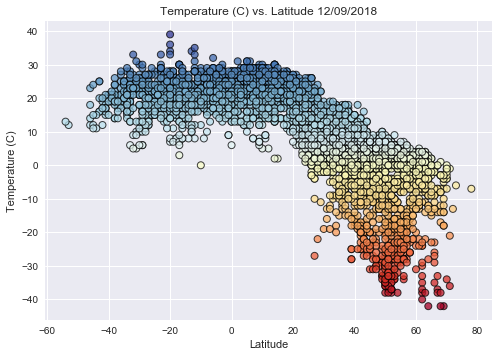

In [17]:
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],
            samplecity['temperature'],
            c=samplecity['temperature'],
            cmap='RdYlBu', edgecolor="black", linewidths=1, marker="o", alpha = 0.75)
plt.title(f"Temperature (C) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.style.use('seaborn')


plt.savefig("Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

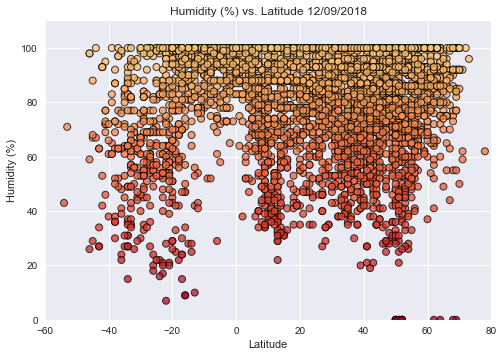

In [9]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'],
            samplecity['humidity (%)'],
            c=samplecity['humidity (%)'],
            cmap='RdYlBu', edgecolor="black", linewidths=1, marker="o", alpha = 0.75)

plt.title(f"Humidity (%) vs. Latitude {date}")
plt.style.use('seaborn')            
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim([-60, 80])
plt.ylim([0, 110])

plt.savefig("Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

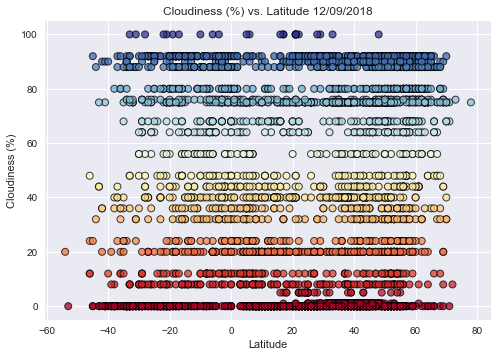

In [10]:
# plt.scatter(latitude,cloudy)

plt.scatter(samplecity['latitude'],
            samplecity['cloudiness (%)'],
            c=samplecity['cloudiness (%)'],
            cmap='RdYlBu', edgecolor="black", linewidths=1, marker="o", alpha = 0.75)

plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('seaborn')

plt.savefig("Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

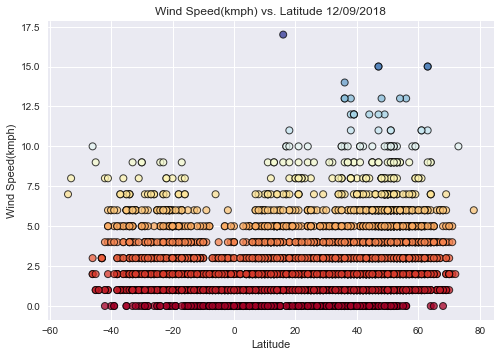

In [14]:
# plt.scatter(latitude,windspeed)

plt.scatter(samplecity['latitude'],
            samplecity['wind_speed (kmph)'],
            c=samplecity['wind_speed (kmph)'],
            cmap='RdYlBu', edgecolor="black", linewidths=1, marker="o", alpha = 0.75)
plt.title(f"Wind Speed(kmph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(kmph)")
plt.style.use('seaborn')

plt.savefig("Wind_Speed.png")

plt.show()

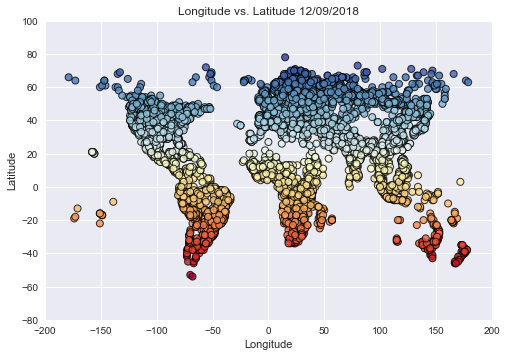

In [13]:
# Extra: Lat vs Long for City Distribution- 
# This is the main reason I didn't limit to 500, I saw someone else do this online and thought it was really cool.

#plt.scatter(samplecity['longitude'], 
 #           samplecity['latitude'], c=samplecity['latitude'], marker="o", alpha = 0.75)
plt.scatter(samplecity["longitude"], 
            samplecity["latitude"], c=samplecity["latitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='RdYlBu', alpha=0.8, label="City")   

plt.style.use('seaborn')
plt.title(f"Longitude vs. Latitude {date}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim([-200, 200])
plt.ylim([-80, 100])

plt.savefig("City_Distribution.png")

plt.show()